In [18]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# Load the dataset
data = pd.read_csv("C:\\Users\\LAPTOP SHOP\\Downloads\\advertising.csv")

# Display the first few rows
print("First 5 rows of the dataset:")
display(data.head())

# Check the dataset structure
print("\nDataset Information:")
data.info()

# Check for null or missing values
print("\nMissing Values:")
print(data.isnull().sum())



First 5 rows of the dataset:


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB

Missing Values:
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


Summary Statistics:


,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


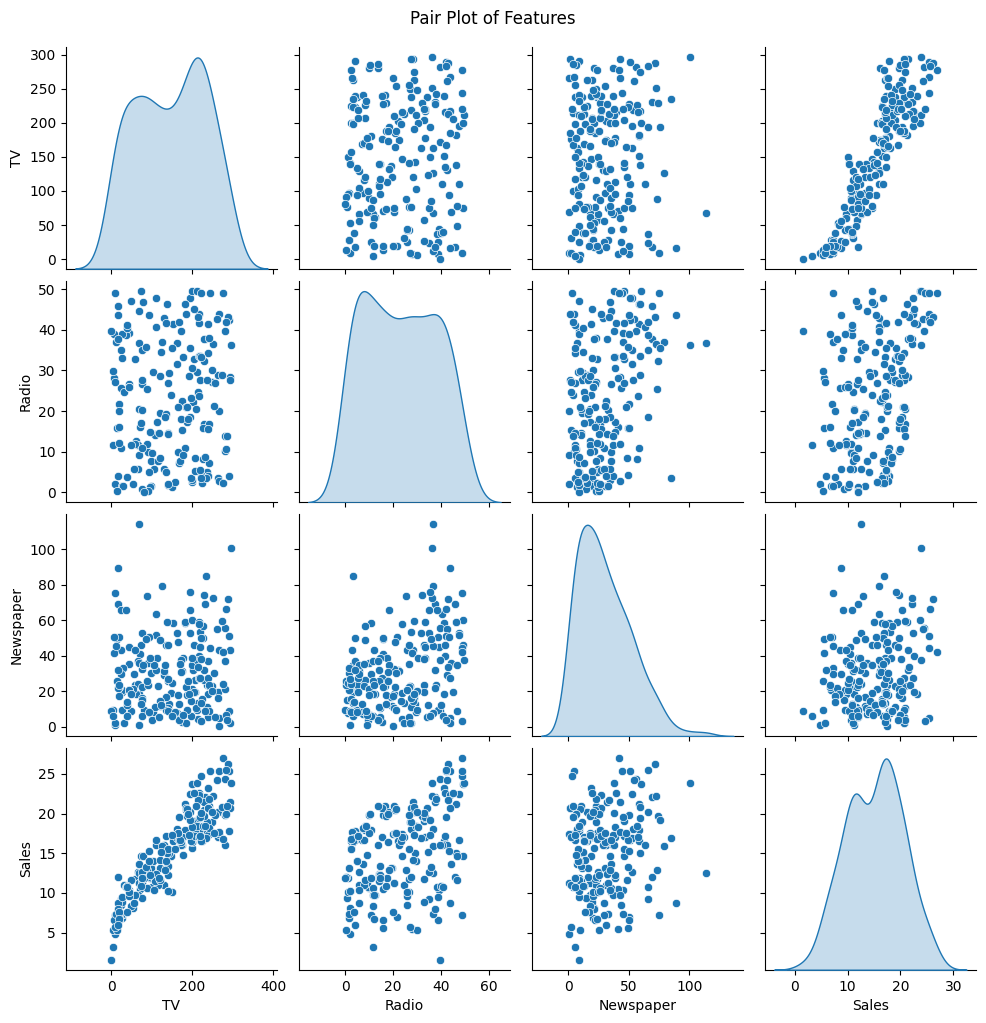

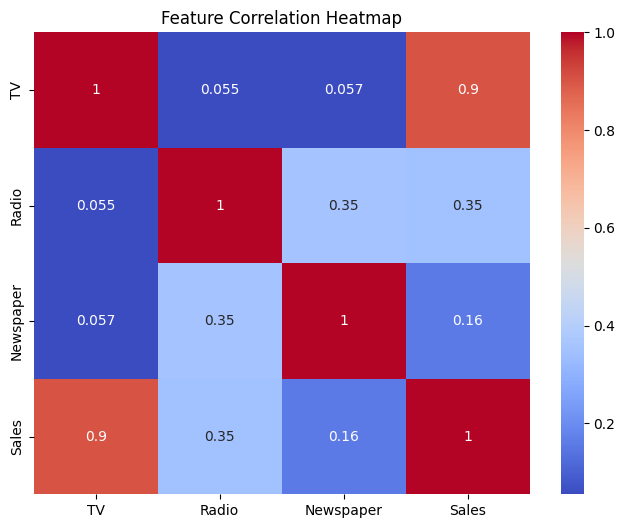

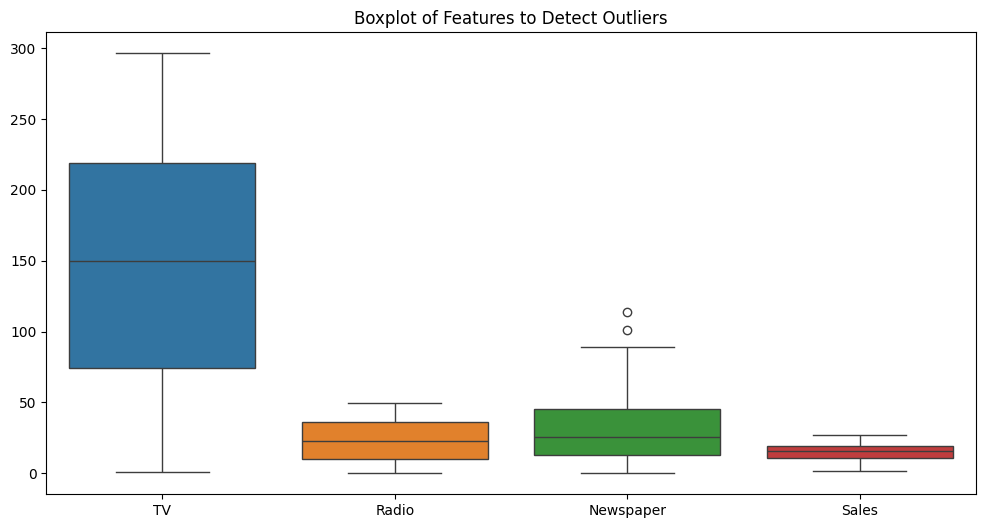

In [19]:
# Summary statistics
print("Summary Statistics:")
display(data.describe())

# Pair plot to visualize feature relationships
sns.pairplot(data, diag_kind='kde')
plt.suptitle("Pair Plot of Features", y=1.02)
plt.show()

# Heatmap to see correlations
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

# Boxplot to detect outliers and distribution
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[['TV', 'Radio', 'Newspaper', 'Sales']])
plt.title("Boxplot of Features to Detect Outliers")
plt.show()

In [20]:
# Define features (X) and target (y)
X = data[['TV', 'Radio']]  # Focus only on TV and Radio
y = data['Sales']

# Check the updated data
print("Updated features:")
print(X.head())


Updated features:
      TV  Radio
0  230.1   37.8
1   44.5   39.3
2   17.2   45.9
3  151.5   41.3
4  180.8   10.8


In [21]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


# Define features and target
X = data[['TV', 'Radio']]  # Only TV and Radio features
y = data['Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Training set shape: (160, 2)
Test set shape: (40, 2)


In [22]:
# Initialize and train the Linear Regression model
model = sklearn.linear_model.LinearRegression()
model.fit(X_train, y_train)

# Display the coefficients and intercept
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)


Model Coefficients: [0.05450736 0.10325764]
Model Intercept: 4.791381661776025


In [23]:
# Make predictions
y_pred = model.predict(X_test)

# Display predictions and actual values
print("Predicted Sales (first 5):", y_pred[:5])
print("Actual Sales (first 5):", y_test[:5].values)


Predicted Sales (first 5): [16.95537518 20.36750946 23.67877906  9.23932462 21.8589777 ]
Actual Sales (first 5): [16.9 22.4 21.4  7.3 24.7]


In [24]:
# Evaluate model performance
mae = sklearn.metrics.mean_absolute_error(y_test, y_pred)
mse = sklearn.metrics.mean_squared_error(y_test, y_pred)
r2 = sklearn.metrics.r2_score(y_test, y_pred)

# Display results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")


Mean Absolute Error (MAE): 1.27
Mean Squared Error (MSE): 2.85
R-squared (R²): 0.91


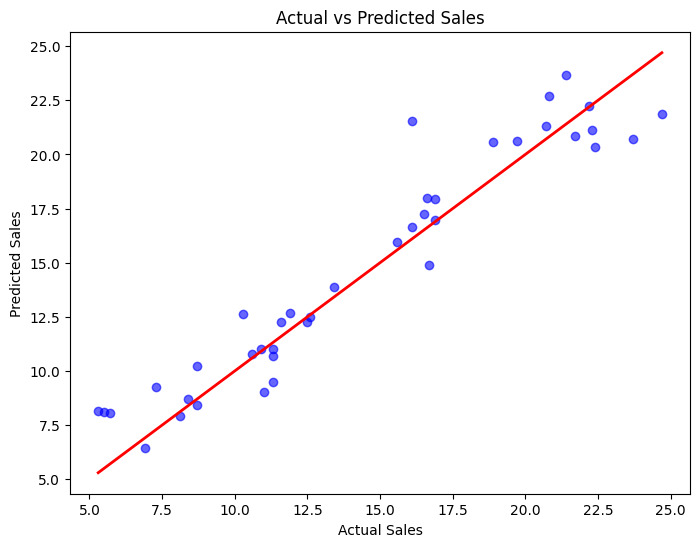

In [25]:
# Plot Actual vs Predicted Sales
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)  # Diagonal line
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()

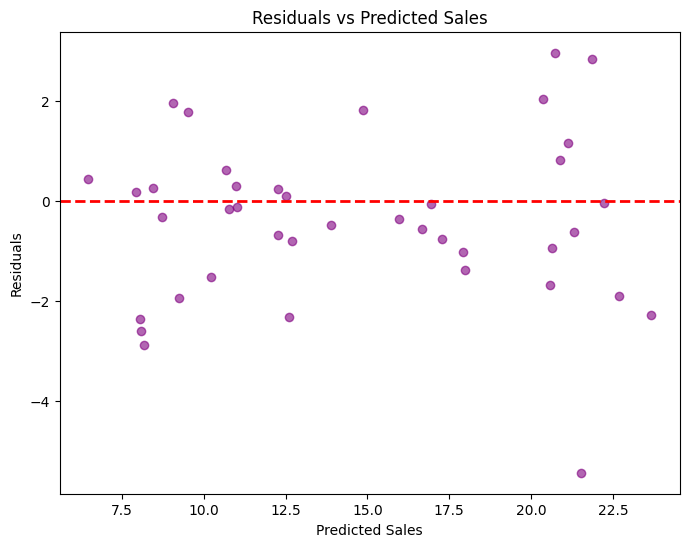

In [26]:
# Calculate Residuals
residuals = y_test - y_pred

# Plot Residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color='purple', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--', lw=2)
plt.xlabel("Predicted Sales")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Sales")
plt.show()
